In [1]:
%pylab inline
from pyannote.core.notebook import set_notebook_crop

Populating the interactive namespace from numpy and matplotlib


# Segment (`pyannote.core.segment.Segment`)

In [2]:
from pyannote.core import Segment

**`Segment`** instances are used to describe temporal fragments (e.g. of an audio file).

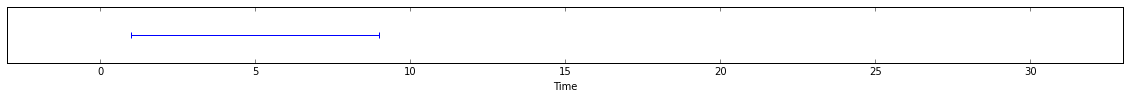

In [18]:
# start time in seconds
s = 1.
# end time in seconds
e = 9.
segment = Segment(start=s, end=e)
segment

**`Segment`** instances are nothing more than 2-tuples augmented with several useful methods and properties.

In [4]:
start, end = segment
print 'from %f to %f' % (start, end)

from 1.000000 to 9.000000


In [5]:
print 'Segment %s ends at %g seconds.' % (segment, segment.end)
print 'Its duration is %g seconds.' % (segment.duration)
print 'Its middle stands as %g seconds.' % (segment.middle)

Segment [1.000 --> 9.000] ends at 9 seconds.
Its duration is 8 seconds.
Its middle stands as 5 seconds.


### Intersection

In [6]:
other_segment = Segment(4, 13)
if segment.intersects(other_segment):
    print 'Segment %s intersects other segment %s.' % (segment, other_segment)
    intersection = segment & other_segment
    print 'Their intersection is %s.' % (str(intersection))

Segment [1.000 --> 9.000] intersects other segment [4.000 --> 13.000].
Their intersection is [4.000 --> 9.000].


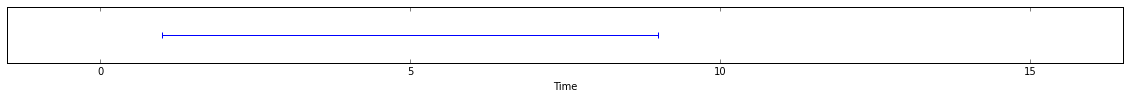

In [7]:
set_notebook_crop(Segment(0, 15))
segment

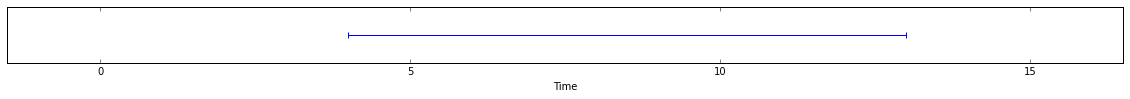

In [8]:
other_segment

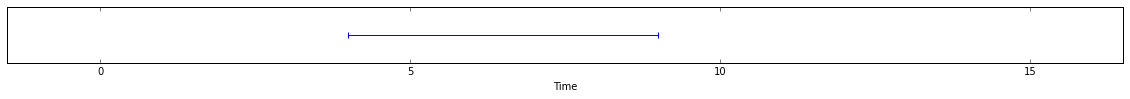

In [9]:
segment & other_segment

In [10]:
other_segment = Segment(13, 20)
if not (segment & other_segment):
    print 'Those two segments do not intersect.'

Those two segments do not intersect.


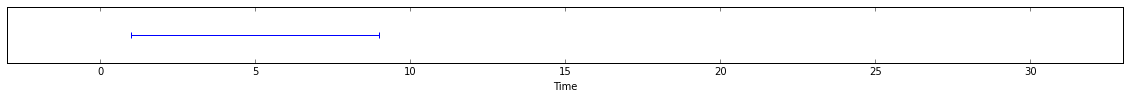

In [11]:
set_notebook_crop(Segment(0, 30))
segment

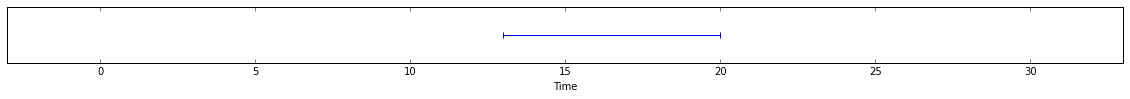

In [12]:
other_segment

### Inclusion

In [13]:
other_segment = Segment(5, 6)
if other_segment in segment:
    print '%s in included in %s' % (other_segment, segment)

[5.000 --> 6.000] in included in [1.000 --> 9.000]


In [14]:
t = 23.
if not segment.overlaps(t):
    print '%s does not contain time %f' % (segment, t)

[1.000 --> 9.000] does not contain time 23.000000


### Other operations

In [15]:
other_segment = Segment(10, 30)
print 'Union of %s and %s is %s' % (segment, other_segment, segment | other_segment)

Union of [1.000 --> 9.000] and [10.000 --> 30.000] is [1.000 --> 30.000]


In [16]:
other_segment = Segment(14, 15)
print 'Gap between %s and %s is %s' % (segment, other_segment, segment ^ other_segment)

Gap between [1.000 --> 9.000] and [14.000 --> 15.000] is [9.000 --> 14.000]


### Need help?

You can always try the following...  
Who knows? It might give you the information you are looking for!

In [17]:
help(Segment)

Help on class Segment in module pyannote.core.segment:

class Segment(Segment)
 |  Temporal interval defined by its `start` and `end` times.
 |  
 |  Multiple segment operators are available -- including intersection (&),
 |  inclusion (in), emptiness test, start/end time shifting (+, -, >>, <<).
 |  They are illustrated in **Examples** section.
 |  
 |  Comparison of two segments is also available (==, !=, <, <=, >, >=).
 |  Two segments are equal iff they have identical start and end times.
 |  Segment S is smaller than segment T iff S.start < T.start or if they have
 |  the same start time and S.end < T.start.
 |  
 |  Parameters
 |  ----------
 |  start, end : float
 |      `start` and `end` times, in seconds.
 |  
 |  Returns
 |  -------
 |  segment : Segment
 |      New segment with `start` and `end` times.
 |  
 |  Examples
 |  --------
 |  Create a new temporal interval between 00:13.000 and 00:37.000.
 |  
 |      >>> segment = Segment(start=13., end=37)
 |      >>> print segm